# The advection equation
Numerical solution of the 1D advection problem
$$ \frac{\partial T}{\partial t} =  -c \frac{\partial T}{\partial x}$$ 
using an explicit forward in time, centred in space scheme

$T(x,t)$ represents the evolution of temperature distribution along the estuary over time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

## User defined parameters

In [2]:
# problem parameters
c=0.1       # Advection speed [m s-1]
dx=500    # X resolution [m]
dt=100     # time step [s]
t0=0.       # initial time
tmax=0.1    # duration of simulation [days]
xmax=10.0e3 # length of the basin [m]

# Parameters of the initial temperature distribution
T0 = 15.        # baseline temperature [degC]
sigma = 2000.   # width at half amplitude [m]
A = 5.          # amplitude [degC]

## Initial function and grid specifications
The initial shape of the temperature distribution is a Gaussian peak function

In [3]:
# Spatial shape of the temperature disturbance
def Gaussian(x):
    y = T0+A*np.exp(-(x/sigma)**2)
    return y

The resulting space-time grid depends on the parameters above

In [4]:
# time axis
NT = int(np.floor(tmax*86400/dt))+1  # number of steps (starts from 0)
# X axis (centred at 0)
x = np.arange(-xmax,xmax,dx)
IM = len(x)             # number of grid points
T = np.zeros([IM,NT])     # the array holding the numerical solution 
print('Grid steps : ',IM)
print('Number of time steps : ',NT)
print('Timestep = ',dt,' s')
print('Max numerical speed DX/DT = ',dx/dt,' m/s')
print('Physical speed = ',c,' m/s')
print('Courant number = ',c*dt/dx)

Grid steps :  40
Number of time steps :  87
Timestep =  100  s
Max numerical speed DX/DT =  5.0  m/s
Physical speed =  0.1  m/s
Courant number =  0.02


## Numerical solution
Note that this code stores the solution at all times in array T for educational purposes. This allows to plot the solution at the different time steps and see how it evolves.

*This method is very inefficient for any application because it uses a lot of memory. In modern computer codes only a few time records are hold in memory. The instantaneous solution is often temporarely stored for computing time averages and then discarded.*

This part of the code is the topic of some questions found in the lecture notes

In [5]:
# Compute the numerical solution using a time loop over the number of time steps
T[:,0] = Gaussian(x)    # initial condition

for n in range(NT-1): # for all the future timesteps - forward
    # Question 1
    T[0,n+1]  = T0 
    T[-1,n+1] = T0
    # Question 2 and Question 3
    rhs = -c*(T[2:,n]-T[:-2,n])/(2.*dx) # L1
    T[1:-1,n+1] = T[1:-1,n] + rhs*dt    # L2

## Question 1: 

These lines are setting boundary conditions for the numerical solution at the next time step (`n+1`). The left boundary condition is set equal to `T0` by `T[0, n+1] = T0`. The right boundary condition is set equal to `T0` by `T[-1, n+1] = T0`. This defines what the solution is acting on, on either side. It confines the perturbation within the boundary of `T0` - in other words, it makes sure that you have `T0` on either side of the solution. 

## Question 2: 

Line one is the descretized forward-in-time and centered-in-space formulation of the right hand side of the partial differential equation. This is approximately equal to the change in temperature over change in time. Line two is rearranging the discretized components of the PDE to solve for the temperature at space index `i` and time index `n`.

## Question 3: 

Line 1: `T[-1,n+1]` is the boundary on the right. And `T[0,n+1]` is the on the left. At the current time (now), you subtract the value of `T` to the left of the right boundary (`T[:-2,n]`) from the value of `T` on the right of the left right boundary (`T[2:,n]`). This result is the space-centered difference of `T` now. You only compute this space-centered difference on the two neighbours of the value of `T` now. 

Line 2: `T[1:-1,n]` is the temperature now, at time index n. 

## Plot the result using a matplotlib animation
The animation below displays the evolution of the solution and compares it with the analytical solution

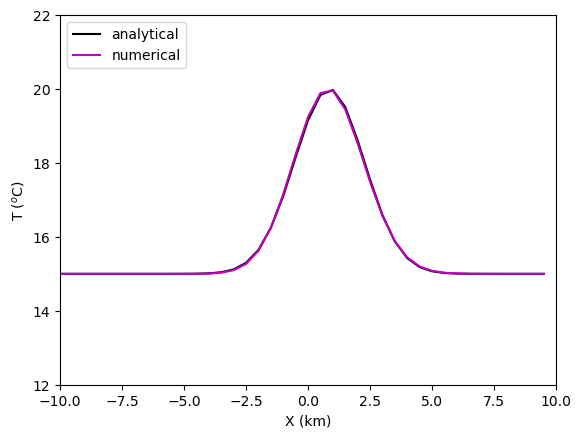

In [6]:
fig, ax = plt.subplots()
# set the axis limits
plt.axis([-xmax/1000, xmax/1000, T0-3, T0+7])
# first plot the initial conditions and set the line attributes
line, = ax.plot(x/1000., Gaussian(x),'k',label='analytical')
sol, = ax.plot(x/1000., T[:,0],'m',label='numerical')
ax.set_xlabel('X (km)')
ax.set_ylabel('T ($^o$C)')
plt.legend(loc='upper left')

def animate(i):
    t = t0 + i*dt
    line.set_ydata(Gaussian(x-c*t))  # update the analytical solution
    sol.set_ydata(T[:,i])  # update the numerical solution
    return line,sol,

# create the animation and loop (interval is in ms)
ani = animation.FuncAnimation(
    fig, animate, interval=dt, blit=True, frames=NT, repeat=True)

# To save the animation, use e.g.
# ani.save("movie.mp4")
# or
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

# display the animation as a javascript object embedded in the notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

## Question 4

Both start as the position and the analytical solution propagates constantly over time. The numerical solutions diverges from the analytical: The amplitude increases and the spread decreases. This is likely due to additive truncation errors. (the analytical solution has no error)

## Question 5 

I don't see that anything changed when halving the dx. 

When you increase the max numerical speed, by increasing dx and decreasing dt, I would expect the numerical solution to diverge from the analytical. The solution is stable because the Courant number is positive and close to zero. The numerical speed is greater than the physical speed, and this causes the numerical solution to spread out over time. 

## Question 6 



If you decrease the spread, you need to decrease the time and spatial scale to resolve the steeper curve. If you have both the time ad spatial intervals, the courant number is maintained with the same number of spatial and temporal steps used to resolve the steeper curve. 

Grid steps :  80
Number of time steps :  173
Timestep =  50  s
Max numerical speed DX/DT =  5.0  m/s
Physical speed =  0.1  m/s
Courant number =  0.02


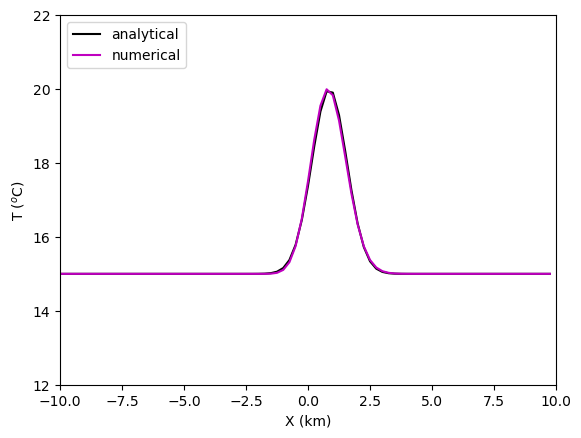

In [7]:
# problem parameters
c=0.1       # Advection speed [m s-1]
dx=250   # X resolution [m]
dt=50    # time step [s]
t0=0.       # initial time
tmax=0.1    # duration of simulation [days]
xmax=10.0e3 # length of the basin [m]

# Parameters of the initial temperature distribution
T0 = 15.        # baseline temperature [degC]
sigma = 1000.   # width at half amplitude [m]
A = 5.          # amplitude [degC]

# Spatial shape of the temperature disturbance
def Gaussian(x):
    y = T0+A*np.exp(-(x/sigma)**2)
    return y

# time axis
NT = int(np.floor(tmax*86400/dt))+1  # number of steps (starts from 0)
# X axis (centred at 0)
x = np.arange(-xmax,xmax,dx)
IM = len(x)             # number of grid points
T = np.zeros([IM,NT])     # the array holding the numerical solution 
print('Grid steps : ',IM)
print('Number of time steps : ',NT)
print('Timestep = ',dt,' s')
print('Max numerical speed DX/DT = ',dx/dt,' m/s')
print('Physical speed = ',c,' m/s')
print('Courant number = ',c*dt/dx)

# Compute the numerical solution using a time loop over the number of time steps
T[:,0] = Gaussian(x)    # initial condition

for n in range(NT-1): # for all the future timesteps - forward
    # Question 1
    T[0,n+1]  = T0 
    T[-1,n+1] = T0
    # Question 2 and Question 3
    rhs = -c*(T[2:,n]-T[:-2,n])/(2.*dx) # L1
    T[1:-1,n+1] = T[1:-1,n] + rhs*dt    # L2

fig, ax = plt.subplots()
# set the axis limits
plt.axis([-xmax/1000, xmax/1000, T0-3, T0+7])
# first plot the initial conditions and set the line attributes
line, = ax.plot(x/1000., Gaussian(x),'k',label='analytical')
sol, = ax.plot(x/1000., T[:,0],'m',label='numerical')
ax.set_xlabel('X (km)')
ax.set_ylabel('T ($^o$C)')
plt.legend(loc='upper left')

def animate(i):
    t = t0 + i*dt
    line.set_ydata(Gaussian(x-c*t))  # update the analytical solution
    sol.set_ydata(T[:,i])  # update the numerical solution
    return line,sol,

# create the animation and loop (interval is in ms)
ani = animation.FuncAnimation(
    fig, animate, interval=dt, blit=True, frames=NT, repeat=True)

# To save the animation, use e.g.
# ani.save("movie.mp4")
# or
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

# display the animation as a javascript object embedded in the notebook
from IPython.display import HTML
HTML(ani.to_jshtml())